**Question 7** -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions for better visualizations

2. Write code comments wherever required for code understanding

**Insights to be drawn** -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Loading the json data
nasa_df=pd.read_json('https://data.nasa.gov/resource/y77d-th95.json')

In [2]:
#Dropping columns that aren't required in output as per question
nasa_df.drop([':@computed_region_cbhk_fwbd',':@computed_region_nnqa_25f4'],axis=1,inplace=True)

In [4]:
#Replacing nulls with dictionary
nasa_df['geolocation'].replace(np.nan,None,inplace=True)
nasa_df['geolocation'].fillna({'type':'Point','coordinates':[]},inplace=True)

In [5]:
# Extracting coordinate value from geolocation column 
nasa_df['coordinates']=nasa_df['geolocation'].apply(lambda x: x['coordinates'])
nasa_df.drop(['geolocation'],axis=1,inplace=True)

In [6]:
#Changing year format to proper datetime format
nasa_df['year']=pd.to_datetime(nasa_df['year'],errors='coerce')

In [7]:
nasa_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"


 **Get all the Earth meteorites that fell before the year 2000**

In [8]:
nasa_df['year_YYYY']=nasa_df['year'].dt.year

In [9]:
nasa_df.fall.value_counts()

Fell     996
Found      4
Name: fall, dtype: int64

In [10]:
nasa_df[(nasa_df.year_YYYY<2000)&(nasa_df.fall=='Fell')].name.unique()

array(['Aachen', 'Aarhus', 'Abee', 'Acapulco', 'Achiras', 'Adhi Kot',
       'Adzhi-Bogdo (stone)', 'Agen', 'Aguada', 'Aguila Blanca',
       'Aioun el Atrouss', 'Aïr', 'Aire-sur-la-Lys', 'Akaba', 'Akbarpur',
       'Akwanga', 'Akyumak', 'Al Rais', 'Alais', 'Albareto', 'Alberta',
       'Aldsworth', 'Aleppo', 'Alessandria', 'Alexandrovsky',
       'Alfianello', 'Allegan', 'Allende', "Alta'ameem", 'Ambapur Nagla',
       'Andhara', 'Andover', 'Andreevka', 'Andura', 'Angers',
       'Angra dos Reis (stone)', 'Ankober', 'Anlong', 'Aomori',
       'Appley Bridge', 'Apt', 'Arbol Solo', 'Archie', 'Arroyo Aguiar',
       'Asco', 'Ashdon', 'Assisi', 'Atarra', 'Atemajac', 'Athens',
       'Atoka', 'Aubres', 'Aumale', 'Aumieres', 'Ausson', 'Avanhandava',
       'Avce', 'Avilez', 'Awere', 'Aztec', 'Bachmut', 'Bahjoi',
       'Bald Mountain', 'Baldwyn', 'Bali', 'Ban Rong Du', 'Bandong',
       'Bansur', 'Banswal', 'Banten', 'Barbotan', 'Barcelona (stone)',
       'Barea', 'Barnaul', 'Barntrup', 'B

In [11]:
nasa_df[(nasa_df.year_YYYY<2000)&(nasa_df.fall=='Fell')].name.nunique()          #912 Earth meteors fell before 2000

912

In [12]:
print(nasa_df['year_YYYY'].min())
print(nasa_df['year_YYYY'].max())

1688.0
2013.0


Text(0.5, 1.0, 'Count of earth meteors that fell in different years bins')

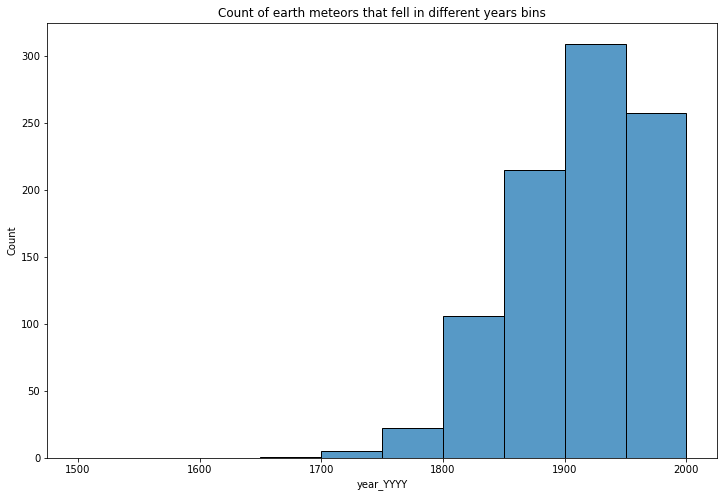

In [766]:
bins=range(1500,2015,50)
plt.figure(figsize=(12,8))
sns.histplot(data=nasa_df, x="year_YYYY",bins=bins)
plt.title('Count of earth meteors that fell in different years bins')

**Get all the earth meteorites co-ordinates who fell before the year 1970**

In [22]:
nasa_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


In [768]:
nasa_df[(nasa_df.year_YYYY<1970)&(nasa_df.fall=='Fell')].coordinates

0          [6.08333, 50.775]
1       [10.23333, 56.18333]
2           [-113, 54.21667]
4        [-64.95, -33.16667]
5               [71.8, 32.1]
               ...          
994             [35.2, 54.5]
995     [79.41667, 13.63333]
997    [111.53333, -7.08333]
998    [106.58333, -6.66667]
999        [34.76667, 47.85]
Name: coordinates, Length: 763, dtype: object

In [782]:
nasa_df[(nasa_df.year_YYYY<1970)&(nasa_df.fall=='Fell')].name.nunique()         #763 Earth meteors fell before 1970

763

In [775]:
#creating temporary data to plot the coordinates
temp=nasa_df[(nasa_df.year_YYYY<1970)&(nasa_df.fall=='Fell')]
temp['x_coordinates']=temp['coordinates'].apply(lambda x :x[0])
temp['y_coordinates']=temp['coordinates'].apply(lambda x :x[1])

C:\Users\Upasana\AppData\Local\Temp/ipykernel_21956/1571572888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['x_coordinates']=temp['coordinates'].apply(lambda x :x[0])
C:\Users\Upasana\AppData\Local\Temp/ipykernel_21956/1571572888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['y_coordinates']=temp['coordinates'].apply(lambda x :x[1])


C:\Users\Upasana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of coordinates where meteors fell before 1970')

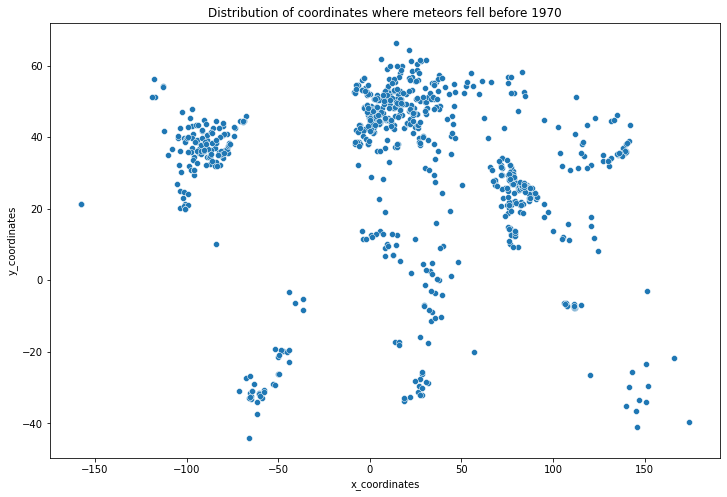

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(temp['x_coordinates'],temp['y_coordinates'])
plt.title('Distribution of coordinates where meteors fell before 1970')

**Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg**

In [27]:
nasa_df[nasa_df.mass>10000]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01T00:00:00.000,44.21667,0.61667,"{'type': 'Point', 'coordinates': [0.61667, 44....",NaN,NaN
11,Aïr,424,Valid,L6,24000.0,Fell,1925-01-01T00:00:00.000,19.08333,8.38333,"{'type': 'Point', 'coordinates': [8.38333, 19....",NaN,NaN
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981-01-01T00:00:00.000,39.91667,42.81667,"{'type': 'Point', 'coordinates': [42.81667, 39...",NaN,NaN
27,Alfianello,466,Valid,L6,228000.0,Fell,1883-01-01T00:00:00.000,45.26667,10.15000,"{'type': 'Point', 'coordinates': [10.15, 45.26...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,Fell,1878-01-01T00:00:00.000,49.60000,17.11667,"{'type': 'Point', 'coordinates': [17.11667, 49...",NaN,NaN
992,Tilden,23998,Valid,L6,74800.0,Fell,1927-01-01T00:00:00.000,38.20000,-89.68333,"{'type': 'Point', 'coordinates': [-89.68333, 3...",34.0,1762.0
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01T00:00:00.000,54.50000,35.20000,"{'type': 'Point', 'coordinates': [35.2, 54.5]}",NaN,NaN
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN


In [28]:
nasa_df[nasa_df.mass>10000].name.nunique() #there are 243 meteors which weigh more than 10000kg

243